# 7FNCE041W-CW1 Computational Methods for Finance

### Question 01 Collect Relevant Data

#### Importing Necessary Libraries

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
import os

In order to retrieve the data through the downloader connected Yahoo Finance API and proceed with the analysis, it is necessary to import the libraries yfinance, numpy, pandas, matplotlib,matplotlib.pyplot, scipy.stats, and os packages.

#### Data Import via yfinance

The equity choosen was SAGE GROUP PLC, constituent of the FTSE 100 Index known as (SGE.L).

The international software company Sage Group plc offers small and medium-sized businesses(SMEs) a variety of business management tools and services. It goes from managing finance or human resources to resource planning (ERP) among other areas of their corporate operations.

Download the data and save it as a pandas Dataframe.

In [3]:
start_date = '2021-11-01'
end_date = '2023-11-01'

In [4]:
sgel_data = yf.download("SGE.L", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


A sample of how the original data looks like including the first rows.

In [5]:
sgel_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,712.000000,714.799988,704.400024,707.200012,674.787964,1734570
2021-11-02,708.799988,717.599976,706.000000,713.400024,680.703918,3614744
2021-11-03,711.200012,716.400024,710.200012,713.400024,680.703918,2607914
2021-11-04,714.000000,741.799988,713.400024,739.599976,705.703003,4239359
2021-11-05,738.799988,753.400024,738.799988,744.200012,710.092224,2787494


A sample of how the original data looks like including the last rows.

In [6]:
sgel_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-25,953.799988,974.000000,953.799988,964.799988,964.799988,4139441
2023-10-26,958.599976,965.799988,952.599976,960.799988,960.799988,3288942
2023-10-27,959.599976,976.200012,955.200012,968.000000,968.000000,1958873
2023-10-30,973.599976,979.400024,972.000000,975.000000,975.000000,3503284
2023-10-31,978.000000,982.239014,965.200012,970.599976,970.599976,4663167


To proceed with the analysis, it is necessary to assign to a new variable "sgel_dataclose" only the column of Adj. Close, disregarding the other unecessary columns.

In [7]:
sgel_dataclose =  sgel_data['Adj Close']

This is how the data looks like now.

In [8]:
sgelhead = sgel_dataclose.head()
summarytable_head = pd.DataFrame(sgelhead).round(2)
summarytable_head

,Adj Close
Date,
2021-11-01,674.79
2021-11-02,680.70
2021-11-03,680.70
2021-11-04,705.70
2021-11-05,710.09


In [9]:
sgeltail = sgel_dataclose.tail()
summarytable_tail = pd.DataFrame(sgeltail).round(2)
summarytable_tail

,Adj Close
Date,
2023-10-25,964.8
2023-10-26,960.8
2023-10-27,968.0
2023-10-30,975.0
2023-10-31,970.6


In [10]:
average_price = sgel_dataclose [416:437]
average_price2 = average_price.mean()
print(average_price2)

923.3523763020834


#### Statistical description

To understand the variable adjust close distribution and main statistical properties, applying the descriptive analysis is crucial to support the next steps.

In [11]:
sgel_description = sgel_dataclose.describe()
summarytable_description = pd.DataFrame(sgel_description).round(2)
summarytable_description

,Adj Close
count,502.00
mean,770.11
std,108.26
min,581.99
25%,690.27
50%,746.63
75%,810.01
max,1039.00


#### Movement of the Equity over the Time Period - Nov-21 to Nov-23

array([<AxesSubplot:xlabel='Date'>], dtype=object)

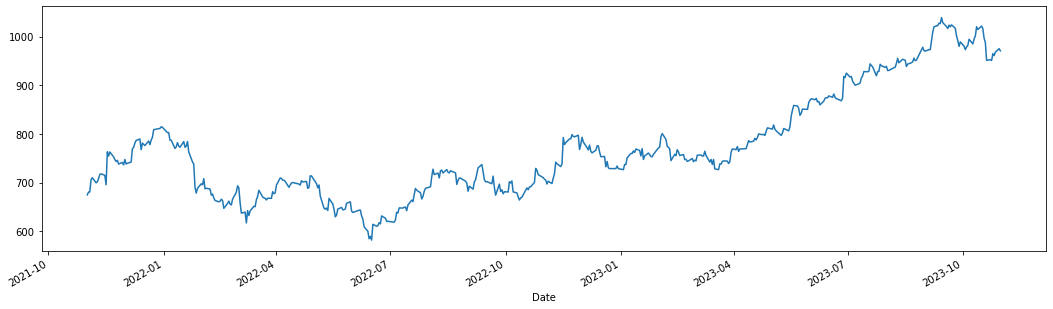

In [12]:
sgel_dataclose.plot(figsize=(18,5), subplots=True)

#### Annualised Average Return and Annualised Standard Deviation

###### Percent Change - Simple Returns

According to Kelton (2023), the percent change in a simple return for derivatives is a measure of the relative price movement of the derivative instrument. This formula calculates the percentage change in the derivative's value over a specified interval.

In [13]:
percent_change = sgel_dataclose.pct_change()
percent_change_mean = percent_change.mean()
print('The percent change is', round(percent_change_mean*100,4), '%')

The percent change is 0.0835 %


###### Daily returns - Log Returns

Università Bocconi (2016) affirms, “the annualised log return is the arithmetic mean of annual log returns". In multi-period returns, log returns are particularly useful because they consider investments made over larger periods, which is the case in this analysis.  

In [14]:
daily_returns = np.log(sgel_dataclose / sgel_dataclose.shift(1))

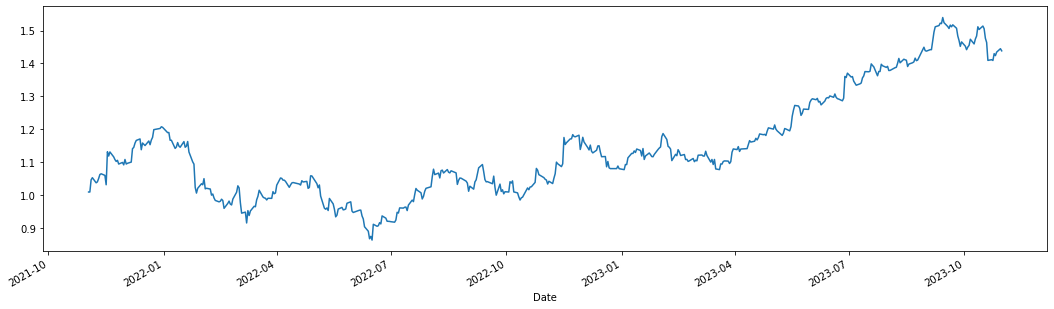

In [15]:
daily_returns.cumsum().apply(np.exp).plot(figsize=(18, 5));

array([<AxesSubplot:xlabel='Date'>], dtype=object)

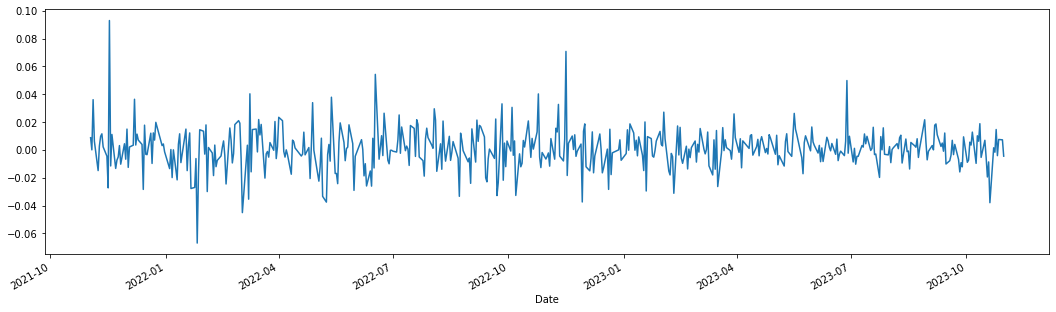

In [16]:
daily_returns.plot(figsize=(18,5), subplots=True)

###### Average Return

In [17]:
daily_return_mean = np.mean(daily_returns)
print('Daily return mean is',daily_return_mean)

Daily return mean is 0.000725580634526118


###### Annualised Average Return

In [18]:
annualised_average_return = daily_return_mean * 252  # Assuming 252 trading days in 
print('The annualised average return is',(annualised_average_return))

The annualised average return is 0.18284631990058176


###### Annualised Standard Deviation

Options Education (no date) denotes volatility as "the annualised standard deviation of stock’s daily price changes." It can be expressed by calculating the standard deviation of daily returns multiplied by the square root of the number of periods of the year. This report considers 252 periods as an average per year. 

In [19]:
std = np.std(daily_returns)
print("Standard Deviation:", std)
annualised_std = std * np.sqrt(252)
print("Annualised Standard Deviation:", annualised_std)

Standard Deviation: 0.014777148755458798
Annualised Standard Deviation: 0.2345799641613096


array([<AxesSubplot:xlabel='Date'>], dtype=object)

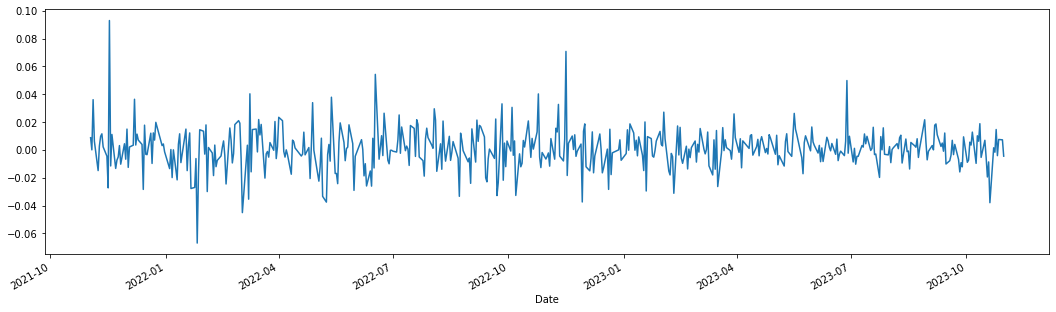

In [20]:
daily_returns.dropna(inplace=True)
daily_returns.plot(subplots=True, figsize=(18, 5))

###### Volatility

In [21]:
vol = np.sqrt(252) * daily_returns.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 23.48 %


### Question 02 Methodology

#### Binomial Tree

Being among the most widely used methods for pricing options, according to Hull (2014), Binomial Trees is an iterative framework that backward builds a diagram based on the rationale that the underlying asset price can only move upward (u factor) or downward (d factor) by a certain percentage in each time period.  

In [22]:
S0 = sgel_dataclose[-1]          # spot stock price
K = 965.00                      # strike
T = 24/52                      # expires in 6 months from now
r = 0.0414                    # 10-Year UK Treasury Rate
sig = vol                    # standard deviation Calculation in item 01 (volatility)
N = 3                      # number of periods or number of time steps  
payoff = "put"             # payoff 

print('The Spot Price is',S0)
print('The Strike Price is',K)
print('The Maturity is 6 months or',T)
print('The Risk Free Rate is',r)
print('The Std Deviation is',sig)
print('The Number of Time Steps is',N)
print('The Payoff is',N)

The Spot Price is 970.5999755859375
The Strike Price is 965.0
The Maturity is 6 months or 0.46153846153846156
The Risk Free Rate is 0.0414
The Std Deviation is 0.2348144269526324
The Number of Time Steps is 3
The Payoff is 3


Determining the U and D factors.

In [23]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [24]:
print('The U factor u is ',(u))

The U factor u is  1.0964764330707255


In [25]:
print('The D factor d is ',(d))

The D factor d is  0.9120123058180654


Calculating the Binomial Tree

In [26]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1): #looping forwards, from 1 to N
    for i in range(z):  #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  # same as z=z+1

In [27]:
print('The binomial tree presenting SGE.L price over 3 time steps ', '\n', (S))

The binomial tree presenting SGE.L price over 3 time steps  
 [[ 970.59997559 1064.23999917 1166.91407822 1279.49378619]
 [   0.          885.19912176  970.59997559 1064.23999917]
 [   0.            0.          807.31249215  885.19912176]
 [   0.            0.            0.          736.27892748]]


In [28]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
print('The risk neutral probability is', (p))

The risk neutral probability is 0.5116292963801488


Find the option value at each final node

In [29]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  79.80087824],
       [  0.        ,   0.        ,   0.        , 228.72107252]])

Find the option value at earlier nodes

In [30]:
# for European Option
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
V

array([[ 54.79764637,  18.79207057,   0.        ,   0.        ],
       [  0.        ,  93.23492359,  38.7249756 ,   0.        ],
       [  0.        ,   0.        , 151.5607323 ,  79.80087824],
       [  0.        ,   0.        ,   0.        , 228.72107252]])

Calculating the european put option value.

In [31]:
print('European ' + payoff, str( V[0,0]))

European put 54.79764636753215


#### Monte Carlo Simulation

Agarwal (2023) defines Monte Carlo simulation as “a stochastic, or random sampling of inputs, method to solve a statistical problem, and a simulation is a virtual representation of a problem.” Thus, it is a high-accuracy prediction method that enables the attainment results through numerous data points of repeated random sampling. 

In [32]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
        # Price process, see Hilpisch (2015) chapter 1 (equation 1-1) & chapter 3 (equation 3-6)
    return S

In [33]:
T = 24/52                # expires in 6 months from now
r = 0.0414                 # risk free rate 
sigma = vol              # standard deviation (volatility)
S0 = sgel_dataclose[-1] # spot stock price
K = 965.00              # strike price
payoff = "put"             # payoff 

print('The Spot Price is',S0)
print('The Strike Price is',K)
print('The Maturity is 6 months or',T)
print('The Risk Free Rate is',r)
print('The Std Deviation is',sig)
print('The Payoff is',N)

The Spot Price is 970.5999755859375
The Strike Price is 965.0
The Maturity is 6 months or 0.46153846153846156
The Risk Free Rate is 0.0414
The Std Deviation is 0.2348144269526324
The Payoff is 3


In [34]:
s_montecarlo = mcs_simulation_np(1000)

Visualise the model simulating multiple trading scenarios throughout the multiple lines, to which a higher spread might indicate more uncertainty.

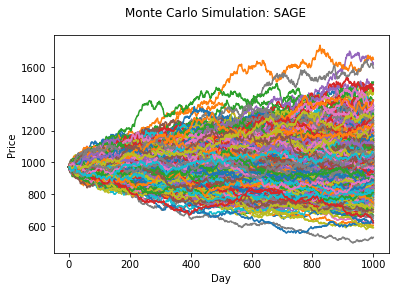

In [35]:
fig = plt.figure()
plt.plot(s_montecarlo)
fig.suptitle('Monte Carlo Simulation: SAGE')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [36]:
s_montecarlo = np.transpose(s_montecarlo)
s_montecarlo

array([[ 970.59997559,  974.81921944,  983.96630226, ..., 1121.83447483,
        1112.99751243, 1110.06278604],
       [ 970.59997559,  969.76715964,  971.50523095, ...,  817.23963337,
         813.87563773,  821.90624792],
       [ 970.59997559,  972.88963514,  973.3885891 , ...,  892.95068295,
         891.94350404,  890.70350346],
       ...,
       [ 970.59997559,  975.02554319,  973.16404262, ..., 1045.23312052,
        1043.77224501, 1050.55151695],
       [ 970.59997559,  971.44143082,  968.52051904, ..., 1289.77468227,
        1294.88580441, 1291.97364773],
       [ 970.59997559,  969.03289533,  967.06235632, ..., 1066.17005806,
        1064.95606544, 1061.36575157]])

Plotting Histogram: The results express signs of normal distribution, there is a higher probability of the outcome being concentrated around the mean, or if the shape is skewed, it might indicate higher dispersion in the outcomes.

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

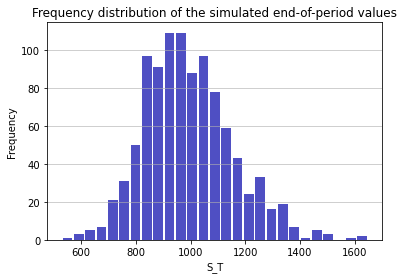

In [37]:
n, bins, patches = plt.hist(x=s_montecarlo[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [38]:
european_put = np.exp(-r*T)*np.mean(np.maximum(K - S[:,-1],0))
print('European put option price is', str(european_put))

European put option price is 75.6706931311601


In [39]:
c = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 101.47583415818609


#### Black Scholes Model

In [40]:
def euro_option_bs(S, K, T, r, vol, payoff): #non-dividend yield paying option
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [41]:
black_scholes = euro_option_bs(S0, K, T, r, vol, 'put')
print('Black-scholes European Put Option Price with no dividend yield is', str(black_scholes))

Black-scholes European Put Option Price with no dividend yield is 49.75324607557599


### Question 03 Analysis - Greeks

#### Delta

Hull (2014) defines delta as "the rate of change as the rate of change of the option price with respect to the price of the underlying asset." In simpler terms, the delta estimates how much the price of the option will fluctuate in response to changes in the price of the underlying asset. It basically measures how sensitive the option's value is to changes in the underlying asset.

In [42]:
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [43]:
delta(S0, K, T, r, vol, 'call')

0.5932112256331942

In [44]:
delta(S0, K, T, r, vol, 'put')

-0.4067887743668058

In [45]:
S_Delta = np.linspace(300, 1500, 50)
Delta_Call = np.zeros((len(S_Delta),1))
Delta_Put = np.zeros((len(S_Delta),1))
for i in range(len(S_Delta)):
    Delta_Call [i] = delta(S_Delta[i], K, T, r, vol, 'call')
    Delta_Put [i] = delta(S_Delta[i], K, T, r, vol, 'put')

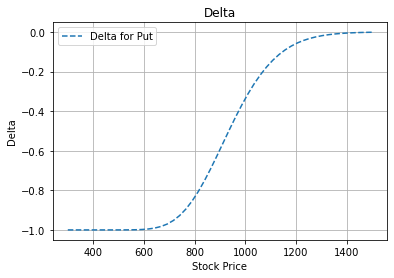

In [46]:
fig = plt.figure()
plt.plot(S_Delta, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

In [47]:
S_Delta_Surface = np.linspace(300, 1500, 50)
T_Delta_Surface = np.linspace(0.5, 2, 52)
Delta_Surface = np.zeros((len(T_Delta_Surface),len(S_Delta_Surface)))
for j in range(len(S_Delta_Surface)):
    for i in range(len(T_Delta_Surface)):
        Delta_Surface[i,j] = delta(S_Delta_Surface[j], K, T_Delta_Surface[i], r, vol, 'put')

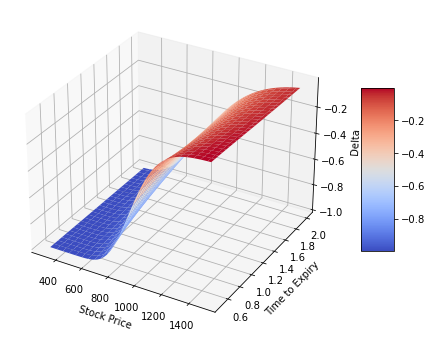

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S_Delta_Surface, T_Delta_Surface = np.meshgrid(S_Delta_Surface, T_Delta_Surface)
surf = ax.plot_surface(S_Delta_Surface, T_Delta_Surface, Delta_Surface, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
#rstride: the array of row stride (step size) cstride: the array of column stride.
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Gamma

Hull (2014) defines gamma as “the rate of change of the portfolio’s delta with respect to the price of the underlying asset”. Then, it measures the rate of change between the delta on the underlying asset and the option’s price, focussing on accessing the delta’s figures.

In [49]:
def gamma(S, K, T, r,  vol, payoff):
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)
    return gamma

In [50]:
gamma(S0, K, T, r, vol, 'call')

0.002505912830698431

In [51]:
gamma(S0, K, T, r, vol, 'put')

0.002505912830698431

In [52]:
S_Gamma = np.linspace(300, 1500, 50)
Gamma_1 = np.zeros((len(S_Gamma),1))
for i in range(len(S_Gamma)):
    Gamma_1 [i] = gamma(S_Gamma[i], K, T, r, vol, 'put')

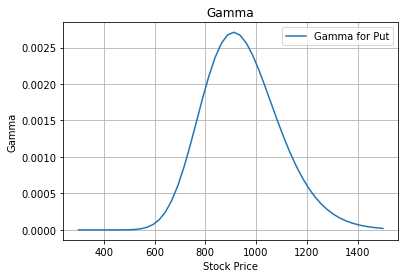

In [53]:
fig = plt.figure()
plt.plot(S_Gamma, Gamma_1, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [54]:
S_Gamma_Surface = np.linspace(300, 1500, 50)
T_Gamma_Surface = np.linspace(0.5, 2, 51)
Gamma_1 = np.zeros((len(T_Gamma_Surface),len(S_Gamma_Surface)))
for j in range(len(S_Gamma_Surface)):
    for i in range(len(T_Gamma_Surface)):
        Gamma_1[i,j] = gamma(S_Gamma_Surface[j], K, T_Gamma_Surface[i], r, vol, 'put')

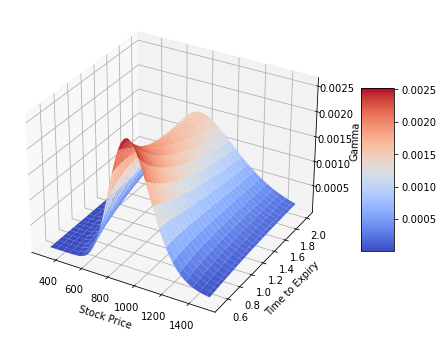

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S_Gamma_Surface, T_Gamma_Surface = np.meshgrid(S_Gamma_Surface, T_Gamma_Surface)
surf = ax.plot_surface(S_Gamma_Surface, T_Gamma_Surface, Gamma_1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Theta

Hull (2014) defines theta as “the rate of change of the value of the portfolio with respect to the passage of time with all else remaining the same”. Then, a measurement of the price of an option’s sensitivity to its time to maturity. 

In [56]:
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [57]:
theta(S0, K, T, r, vol, 'call')

-85.87193930370714

In [58]:
theta(S0, K, T, r, vol, 'put')

-46.67706381662776

In [59]:
S_Theta = np.linspace(0.25,3,10)
Theta_Put = np.zeros((len(S_Theta),1))
for i in range(len(S_Theta)):
    Theta_Put [i] = theta(S0, K, S_Theta[i], r, vol, 'put')

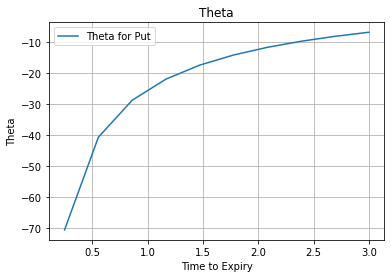

In [60]:
fig = plt.figure()
plt.plot(S_Theta, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

In [61]:
S_Theta_Surface = np.linspace(300, 1500, 50)
T_Theta_Surface = np.linspace(0.5, 2, 51)
Theta_1 = np.zeros((len(T_Theta_Surface),len(S_Theta_Surface)))
for j in range(len(S_Theta_Surface)):
    for i in range(len(T_Theta_Surface)):
        Theta_1[i,j] = theta(S_Theta_Surface[j], K, T_Theta_Surface[i], r, vol, 'put')

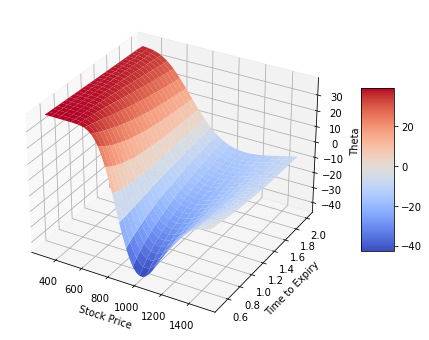

In [62]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S_Theta_Surface, T_Theta_Surface = np.meshgrid(S_Theta_Surface, T_Theta_Surface)
surf = ax.plot_surface(S_Theta_Surface, T_Theta_Surface, Theta_1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Rho

Hull (2014) defines Rho as “the rate of change of the value of the portfolio with respect to the interest rate”. In other words, it measures sensitivity levels of the option price in relation to changes in interest rates. 

In [63]:
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [64]:
rho(S0, K, T, r, vol, 'call')

231.76324723000727

In [65]:
rho(S0, K, T, r, vol, 'put')

-205.19188640521438

In [66]:
S_Rho = np.linspace(0.0,0.1,11)
Rho_Put = np.zeros((len(S_Rho),1))
for i in range(len(S_Rho)):
    Rho_Put [i] = rho(S0, K, T, S_Rho[i], vol, 'put')

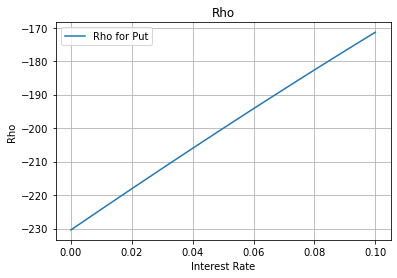

In [67]:
fig = plt.figure()
plt.plot(S_Rho, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

In [68]:
S_Rho_Surface = np.linspace(300, 1500, 50)
T_Rho_Surface = np.linspace(0.5, 2, 51)
Rho_1 = np.zeros((len(T_Rho_Surface),len(S_Rho_Surface)))
for j in range(len(S_Rho_Surface)):
    for i in range(len(T_Rho_Surface)):
        Rho_1[i,j] = rho(S_Rho_Surface[j], K, T_Rho_Surface[i], r, vol, 'put')

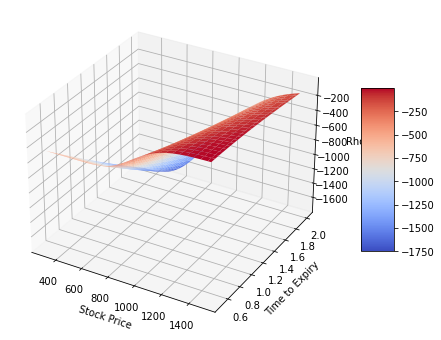

In [69]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S_Rho_Surface, T_Rho_Surface = np.meshgrid(S_Rho_Surface, T_Rho_Surface)
surf = ax.plot_surface(S_Rho_Surface, T_Rho_Surface, Rho_1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

#### Vega

Hull (2014) defines vega as “the rate of change of the value of the portfolio with respect to the volatility of the underlying asset”. In summary evaluates the sensitivity of an option's pricing to variations in the volatility of the underlying asset. 

In [70]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [71]:
vega(S0, K, T, r, vol, 'call')

255.84632690643195

In [72]:
vega(S0, K, T, r, vol, 'put')

255.84632690643195

In [73]:
s_vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(s_vol),1))
for i in range(len(s_vol)):
    Vega [i] = vega(S0, K, T, r, s_vol[i], 'put')

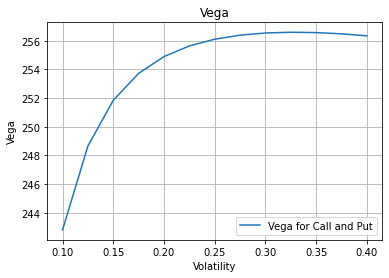

In [74]:
fig = plt.figure()
plt.plot(s_vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [75]:
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [76]:
S_Vega_Surface = np.linspace(300, 1500, 50)
T_Vega_Surface = np.linspace(0.5, 2, 51)
Vega_1 = np.zeros((len(T_Vega_Surface),len(S_Vega_Surface)))
for j in range(len(S_Vega_Surface)):
    for i in range(len(T_Vega_Surface)):
        Vega_1[i,j] = vega(S_Vega_Surface[j], K, T_Vega_Surface[i], r, vol, 'put')

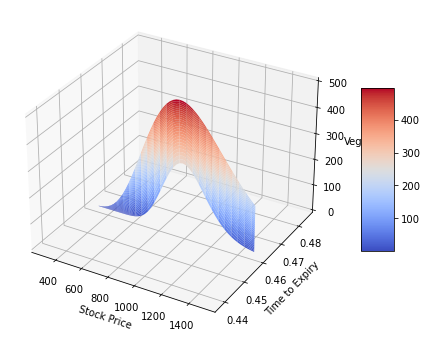

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S_Vega_Surface, T_Vega_Surface = np.meshgrid(S_Vega_Surface, T)
surf = ax.plot_surface(S_Vega_Surface, T_Vega_Surface, Vega_1, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [78]:
v = vega(S0, K, T, r, vol, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 255.8463 . If the volatility increases 1%, then the value of the option will increase $ 2.558463 .
